In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_csv('/content/Task1train.csv')
print(data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [2]:
features = data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
target = data['SalePrice']
features.head()

,GrLivArea,BedroomAbvGr,FullBath
0,1710,3,2
1,1262,3,2
2,1786,3,2
3,1717,3,1
4,2198,4,2


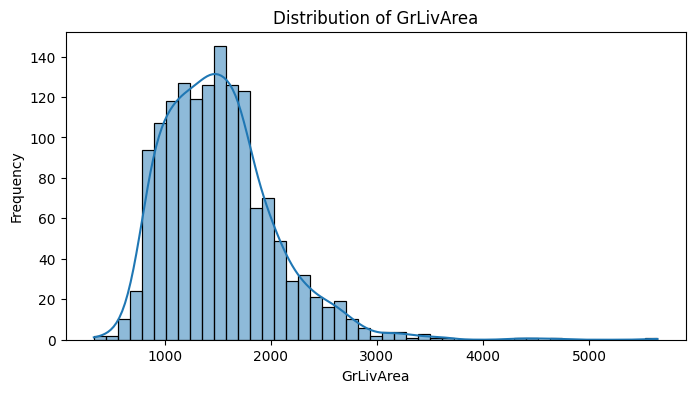

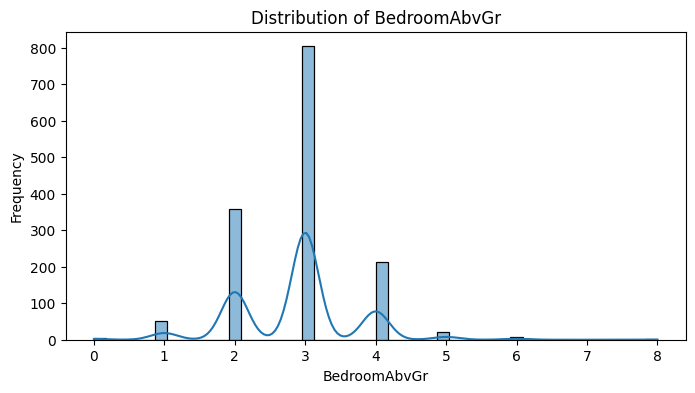

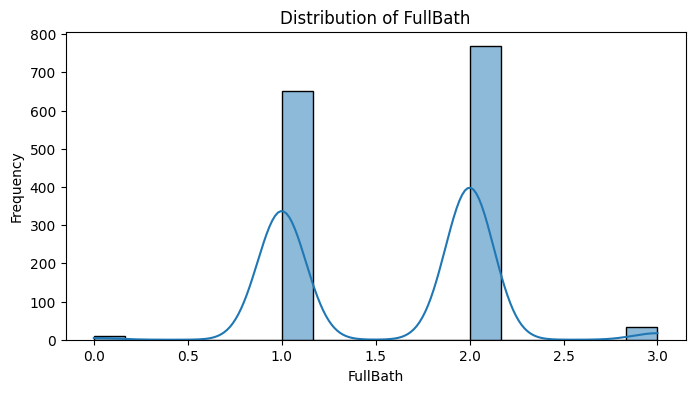

In [4]:
import seaborn as sns

features_list = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
for feature in features_list:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


In [5]:
features.shape[0]

1460

In [6]:
target.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [7]:
features = features.dropna()
target = target[features.index]
print(features.head())

   GrLivArea  BedroomAbvGr  FullBath
0       1710             3         2
1       1262             3         2
2       1786             3         2
3       1717             3         1
4       2198             4         2


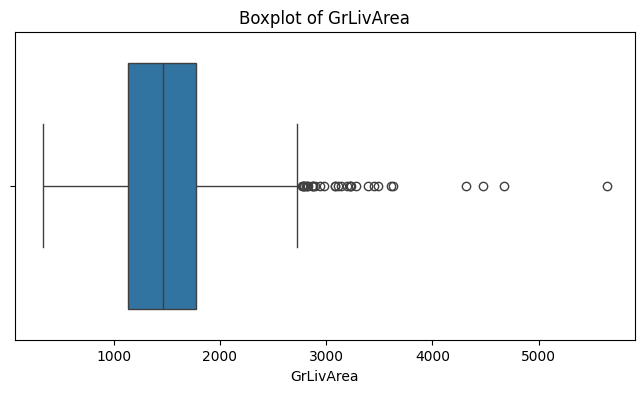

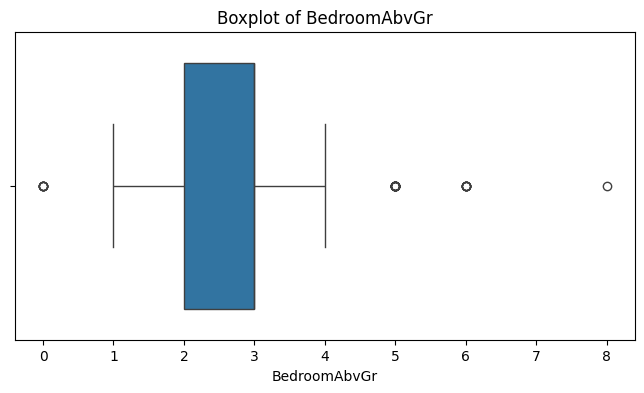

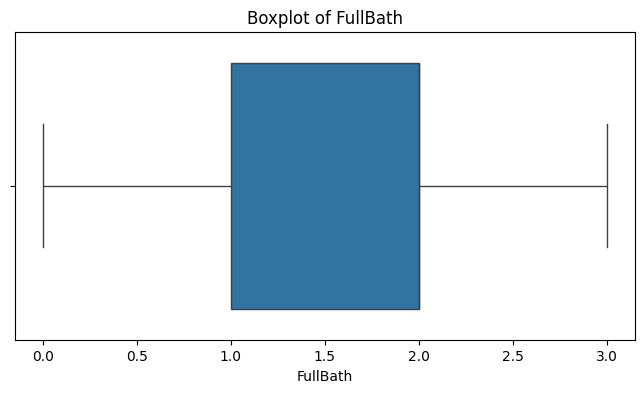

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
features_list = ['GrLivArea', 'BedroomAbvGr', 'FullBath']

for feature in features_list:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

In [9]:
features.shape[0]

1460

In [10]:
df = pd.concat([features, target], axis=1)
z_scores = np.abs(stats.zscore(df))
threshold = 3
df_clean = df[(z_scores < threshold).all(axis=1)]
features_clean = df_clean[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
target_clean = df_clean['SalePrice']
print("Number of rows in features after removing outliers:", features_clean.shape[0])


Number of rows in features after removing outliers: 1416


In [11]:
X_train, X_test, y_train, y_test = train_test_split(features_clean, target_clean, test_size=0.2, random_state=42)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [   105.5221405  -25181.69793331  26527.58514752]
Intercept: 50332.10810476741


Mean Squared Error: 2149516234.3291373
Rsquare: 0.5349136523205958


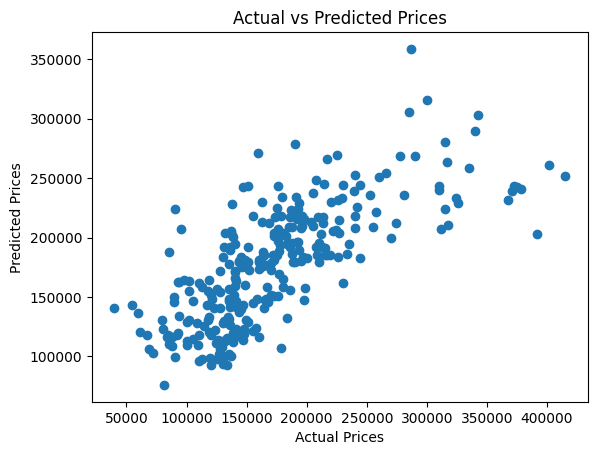

In [13]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Rsquare:", r2)
# Plot the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


In [14]:
cv_scores = cross_val_score(model, features, target, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE:", -cv_scores.mean())

cv_scores_r2 = cross_val_score(model, features, target, cv=5, scoring='r2')
mean_cv_r2 = cv_scores_r2.mean()
print("Cross-validated R-squared:", mean_cv_r2)


Cross-validated MSE: 2679541375.617509
Cross-validated R-squared: 0.5753696622863029


In [15]:
test_data = pd.read_csv('/content/Task1train.csv')
test_features = test_data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
test_features = test_features.fillna(test_features.mean())
print("Number of rows:", test_features.shape[0])


Number of rows: 1460


In [16]:
test_predictions = model.predict(test_features)
submission = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': test_predictions
})
submission.to_csv('submission.csv', index=False)
print("Submission file created.")


Submission file created.
